### 와인데이터 탐색

+ 다운로드한 CSV파일 정리하기
1. 엑셀에서 열 구분자를 세미콜론으로 인식시키기
1. 파이썬에서 저장한 CSV파일을 엑셀에서 열어 상태확인

pd.read_csv('파일경로',구분자,header=0,engine='python')    
header=0을 하면 데이터파일 첫번째 줄을 열이름으로    
engine은 기본이 c로 설정되어있음, 생략해도 되긴함


In [8]:
import pandas as pd
red_df = pd.read_csv('/content/drive/MyDrive/ROCKY/Dataset/wine+quality/winequality-red.csv',sep=';',header=0,engine = 'python')
white_df = pd.read_csv('/content/drive/MyDrive/ROCKY/Dataset/wine+quality/winequality-white.csv',sep=';',header=0,engine = 'python')
red_df.to_csv('/content/drive/MyDrive/ROCKY/Dataset/red_2.csv',index = False)
white_df.to_csv('/content/drive/MyDrive/ROCKY/Dataset/white_2.csv',index = False)

+ 데이터 병합하기
1. 레드,화이트에 type열을 추가하기
1. 레드와인과 화이트 와인 파일 합치기(concat)
1. 결합된 파일 CSV로 저장, 드라이브에서 확인

In [9]:
print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
red_df.insert(0,column = 'type',value = 'red') #병합전 구분자
print(red_df.shape)
red_df.head()

(1599, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
white_df.shape

(4898, 12)

In [12]:
white_df.insert(0,column = 'type',value = 'white')
white_df.shape

(4898, 13)

In [22]:
wine = pd.concat([red_df,white_df])
wine.shape
wine.to_csv('/content/drive/MyDrive/ROCKY/Dataset/wine+quality/wine.csv',index = False)

In [23]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [24]:
wine.columns = wine.columns.str.replace(' ','_')
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


wine.describe() #각 분기데이터를 보면서 평균에 큰영향을 주는게 있는지 검토

### 와인데이터 모델링
1. describe() 함수로 그룹 비교하기
1. t-검정으로 그룹 비교하기
1. 다중 회귀 분석으로 그룹 비교하기

In [26]:
sorted(wine.quality.unique()) #wine의 quality에 어떤값들이 있나 정렬해서 보여줘

[3, 4, 5, 6, 7, 8, 9]

In [27]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [29]:
wine.groupby('type')['quality'].describe()
#mean(평균),std(표준편차)
#아래는 개별적으로 보는 방법
# wine.groupby('type')['quality'].mean()
# wine.groupby('type')['quality'].std()
# wine.groupby('type')['quality'].agg(['mean','std'])


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


---

In [31]:
!pip install statsmodels

In [33]:
 from scipy import stats
 from statsmodels.formula.api import ols, glm

In [34]:
red_wine_quality = wine.loc[wine['type'] == 'red','quality']
white_wine_quality = wine.loc[wine['type'] == 'white','quality']

In [35]:
# 독립표본 t-검정을 수행
#비교할 두 그룹의 데이터, equal_var = False: 두 그룹의 분산이 동일하지 않다고 가정
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var = False)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

statistc(t-검정 통계랑)
+ 두 그룹간의 평균차이를 표준 오차로 나눈값
+ 이 값이 클 수록, 두 그룹간의 평균차이가 큼
+ 음수인 이유는 레드가 작기 때문에
+ -10.1493은 두 그룹간 차이가 매우 크다

pvalue(p-값)
+ 귀무가설이 참일 때, 현재와 같은 결과가 발생할 확률
+ 지금과 같이 매우 작을 떄는 귀무가설을 기각하고 대립가설을 채택
+ 즉 두 그룹간의 평균에 통계적으로 유의미한 차이가 있다고 결론 내린다.

df(자율도)
+ 일반적으로 데이터의 독립적인 요소의 수
+ equl_var=False로 설정해서 조정된 자유도를 의미
---

In [37]:
print(wine.columns)

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [38]:
Rformula = '''quality ~ fixed_acidity + volatile_acidity + citric_acid
+ residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide
+ density + pH + sulphates + alcohol''' #회귀분석 수식 정의
regression_result = ols(Rformula,data = wine).fit() #회귀모델 피팅

In [39]:
regression_result.summary() #결과 요약 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:23:26   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
+ 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [42]:
sample1 = wine[wine.columns.difference(['quality','type'])] #quality와 type을 제외한 모든열
sample1 = sample1[0:5]

In [46]:
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [49]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [50]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8],"chlorides":[0.055,0.04],
"free_sulfur_dioxide":[30.0, 31.0],"total_sulfur_dioxide":[98.0,99],
"density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}
#위 딕셔너리 데이터를 pandas 데이터프레임에 맞게 변환
sample2 = pd.DataFrame(data, columns= sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [51]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-56-b3fc62569c5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality,kde = True, color = 'red', label = 'red wine')
<ipython-input-56-b3fc62569c5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_quality,kde = True, label = 'white wine')


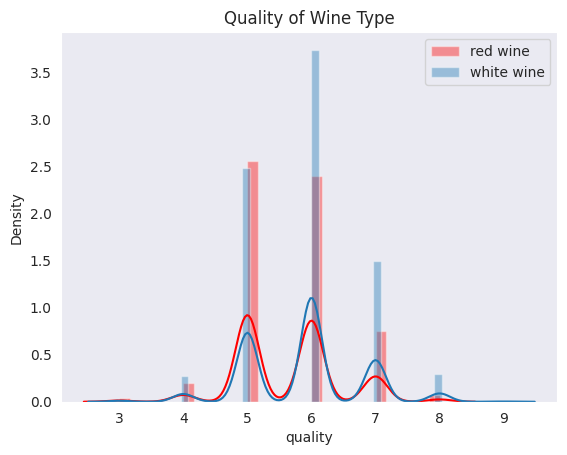

In [56]:
sns.set_style('dark')
sns.distplot(red_wine_quality,kde = True, color = 'red', label = 'red wine')
sns.distplot(white_wine_quality,kde = True, label = 'white wine')
plt.title('Quality of Wine Type')
plt.legend()
plt.show()

In [58]:
import statsmodels.api as sm

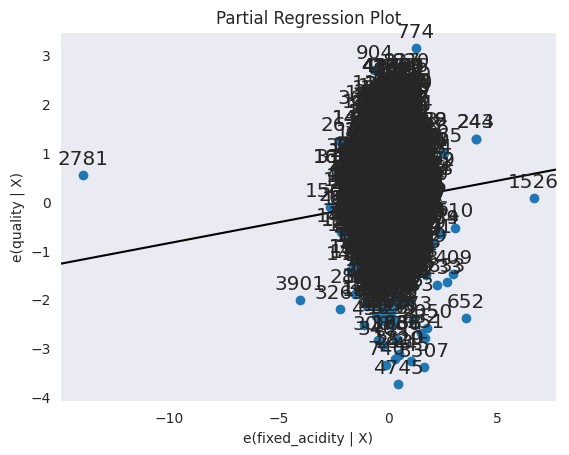

In [61]:
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)
plt.show()

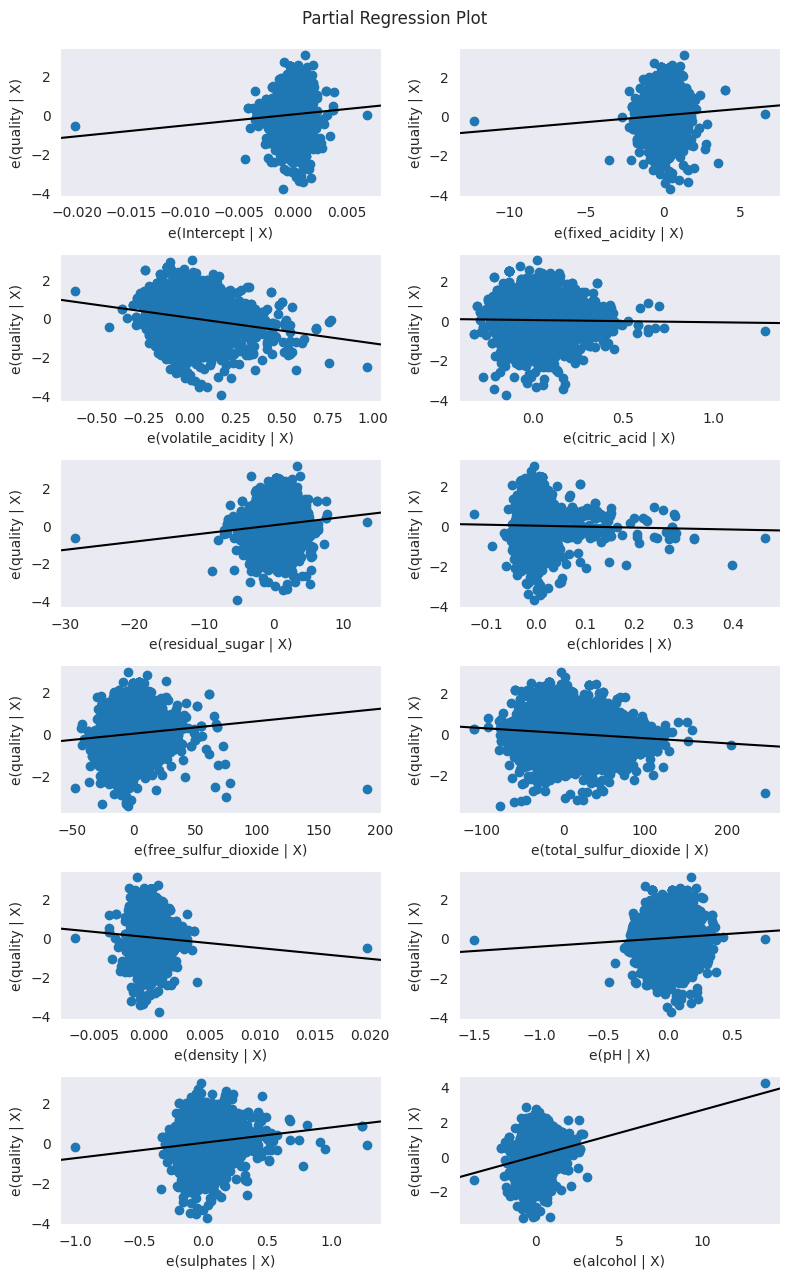

In [63]:
fig = plt.figure(figsize = (8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()